In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing  as prepro
from sklearn.metrics import silhouette_score
import joblib
import pickle
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../assets/train_data.csv", sep=",")
df.head()

In [3]:
#these are the features for training
cols = ["Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Utilization_Ratio"]

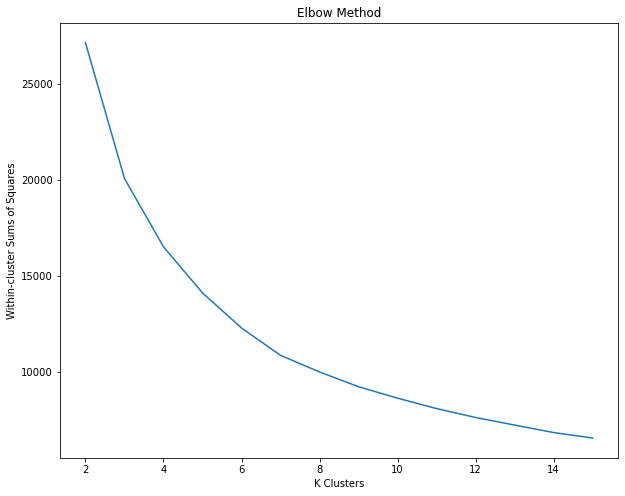

In [4]:
#plot the elbow curve to find the best k number
wcss = []

for i in range(2,16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 42)
    data = StandardScaler().fit_transform(df[cols])
    km.fit(data)
    wcss.append(km.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(2,16), wcss)
plt.title('Elbow Method')
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()

In [ ]:
#build the pipeline for scaling, PCA, and KMeans
preprocessor = Pipeline(
[("scaler", StandardScaler()),
 ("pca", PCA(n_components=2, random_state=42))])

clusterer = Pipeline(
     [
       (
              "kmeans",
               KMeans(
                   n_clusters=3,
                   init="k-means++",
                   n_init=50,
                   max_iter=1000,
                   random_state=42
                      )
       )
      ]
   )

pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )


pipe.fit(df[cols])

In [6]:
#got the Silhouette Score, calculate the goodness of a clustering technique. the higher score the better
preprocessed_data = pipe["preprocessor"].transform(df[cols])

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print('Silhouette Score: ', silhouette_score(preprocessed_data, predicted_labels))

Silhouette Score:  0.4966307006883939


In [7]:
#save pipeline
joblib.dump(pipe,'pipe.joblib')

['pipe.joblib']